# Advanced Regression Models
_Understanding limitations of Linear Regression model and exploring Advanced Regression Models._

In [1]:
# Imports required packages
import pandas as pd

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading data set
ipl_auction = pd.read_csv("../../Data/IPL_IMB381IPL2013.csv")

In [3]:
# Shows the information about this data set
ipl_auction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [4]:
# Overrides the default number of columns that Pandas shows to view all columns in this data set

pd.set_option("display.max_columns", None)

# And then shows the data set
display(ipl_auction)

# Resets backs display setting to its default
pd.reset_option("display.max_columns")

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,0.0,0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,37.6,0,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,32.9,0,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,36.8,0,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,0.0,0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,0,0.0,0,49,16,9.80,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,3,86.6,1,3,3,3.00,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,109,44.3,1,1237,66,26.32,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,278,35.4,0,99,23,9.90,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000


## Modeling

### Creating Transformation Pipeline

In [5]:
# Considers the following features for modeling
features = [
    "AGE", "COUNTRY", "PLAYING ROLE", "T-RUNS", "T-WKTS", "ODI-RUNS-S", "ODI-SR-B", "ODI-WKTS", "ODI-SR-BL", 
    "CAPTAINCY EXP", "RUNS-S", "HS", "AVE", "SR-B", "SIXERS", "RUNS-C", "WKTS", "AVE-BL", "ECON", "SR-BL"]

# Followings are the numeric features
num_features = [
    "AGE", "T-RUNS", "T-WKTS", "ODI-RUNS-S", "ODI-SR-B", "ODI-WKTS", "ODI-SR-BL", "CAPTAINCY EXP", 
    "RUNS-S", "HS", "AVE", "SR-B", "SIXERS", "RUNS-C", "WKTS", "AVE-BL", "ECON", "SR-BL"]

# Followings are the categorical features
cat_features = ["COUNTRY", "PLAYING ROLE"]

In [6]:
# Configures column wise data transformation pipleline

transform_pipeline = ColumnTransformer([
    ("numeric", StandardScaler(), num_features), 
    ("categorical", OneHotEncoder(), cat_features)])

In [7]:
# Splits the data set into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    ipl_auction[features], ipl_auction["SOLD PRICE"], test_size=0.2, random_state = 42)

In [8]:
# Prepares (transforms) the training data for modeling
X_train_transformed = transform_pipeline.fit_transform(X_train)

### Training Models

**Training with Linear Regression**

In [9]:
# Trains the linear regression model on transformed train data set

lin_reg = LinearRegression()
lin_reg.fit(X_train_transformed, y_train)

LinearRegression()

**Analysing the Effect of Coefficient on Model Feature**

In [10]:
# Stores friendly names for encoded categorical features

encoded_cat_features_names = transform_pipeline.named_transformers_["categorical"].get_feature_names_out(
    ['COUNTRY', 'PLAYING ROLE']).tolist()

print(encoded_cat_features_names)

['COUNTRY_AUS', 'COUNTRY_BAN', 'COUNTRY_ENG', 'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL', 'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Allrounder', 'PLAYING ROLE_Batsman', 'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper']


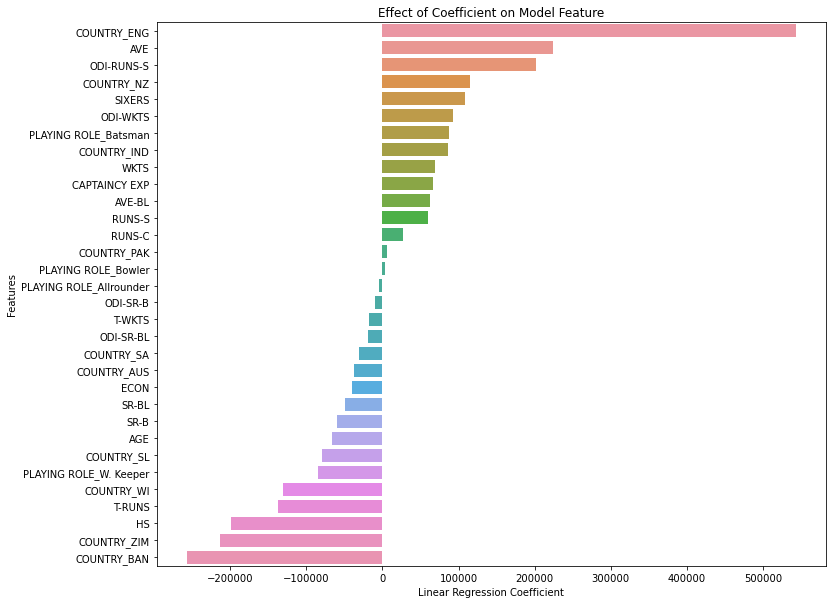

In [11]:
# Stores the model coeffients against respective feature names
lin_reg_coefs = pd.DataFrame(
    {"feature": num_features + encoded_cat_features_names, "coef": lin_reg.coef_})

# Sorts the model coefficients in descending order
lin_reg_coefs.sort_values("coef", ascending = False, inplace = True)

# Plots the coefficients to understand the effect on the respective feature
plt.figure( figsize = ( 12, 10 ))
sns.barplot(x = "coef", y = "feature", data = lin_reg_coefs)
plt.xlabel("Linear Regression Coefficient")
plt.ylabel("Features")
plt.title("Effect of Coefficient on Model Feature")
plt.show()

**Observations from the above figure:**
1. AVE, ODI-RUNS-S, SIXERS are top three highly inﬂuential features which determine the player’s SOLD PRICE.
2. Higher ECON, SR-B and AGE have negative effect on SOLD PRICE.
3. Interestingly, batting strike rate (SR-B), test runs (T-Runs) and highest score (HS) have negative effect on the SOLD PRICE. Few of these counter-intuitive sign for coefficients could be due to multi-collinearity.

**Analyzing Mode Performance**

In [12]:
def get_train_test_rmse(X_train, X_test, y_train, y_test, model):
    """
    Calculates model performance (RMSE) over train and test set
    
    Parameters
    -----------
    X_train: array-like or sparse matrix, shape (n_samples, n_features)
        Training samples.
        
    X_test: array-like or sparse matrix, shape (n_samples, n_features)
        Testing samples.
        
    y_train: array-like of shape (n_samples,)
        Ground truth (correct) target values from training samples.
        
    y_test: array-like of shape (n_samples,)
        Ground truth (correct) target values from testing samples.
        
    Returns
    --------
    rmse: tuple
        A tuple of train and test rmse
        
    """
    
    predictions_train = model.predict(X_train)
    rmse_train = round(mean_squared_error(y_train, predictions_train, squared=False), 3)
    
    predictions_test = model.predict(X_test)
    rmse_test = round(mean_squared_error(y_test, predictions_test, squared=False), 3)
    
    return rmse_train, rmse_test

In [13]:
# Prepares (transforms) the test data for predictions
X_test_transformed = transform_pipeline.transform(X_test)

In [14]:
# Calculates linear regression model performance (RMSE) over train and test set
lin_reg_train_test_rmse = get_train_test_rmse(
    X_train_transformed, X_test_transformed, y_train, y_test, lin_reg)

print("Linear Regression:\n------------------\n")
print("Train RMSE: {}, Test RMSE: {}".format(
    lin_reg_train_test_rmse[0], lin_reg_train_test_rmse[1]))

Linear Regression:
------------------

Train RMSE: 280142.213, Test RMSE: 289879.614


**Regularizing Model with Ridge Regression (L2-Norm)**

In [15]:
ridge_reg = Ridge(alpha=4, max_iter=500)
ridge_reg.fit(X_train_transformed, y_train)

Ridge(alpha=4, max_iter=500)

In [16]:
# Calculates Ridge regression model performance (RMSE) over train and test set
ridge_reg_train_test_rmse = get_train_test_rmse(
    X_train_transformed, X_test_transformed, y_train, y_test, ridge_reg)

print("Ridge Regression:\n------------------\n")
print("Train RMSE: {}, Test RMSE: {}".format(ridge_reg_train_test_rmse[0], ridge_reg_train_test_rmse[1]))

Ridge Regression:
------------------

Train RMSE: 288778.089, Test RMSE: 294325.164


The difference in model accuracy on training and test has reduced. The optimal value for **α** (hyperparameter) can be calculated by technique such as Grid Search (sklearn.model_selection.GridSearchCV).

**Regularizing Model with LASSO Regression (L1-Norm)**

In [17]:
lasso_reg = Lasso(alpha=2, max_iter=5000)
lasso_reg.fit(X_train_transformed, y_train)

Lasso(alpha=2, max_iter=5000)

In [18]:
# Calculates LASSO regression model performance (RMSE) over train and test set
lasso_reg_train_test_rmse = get_train_test_rmse(
    X_train_transformed, X_test_transformed, y_train, y_test, lasso_reg)

print("LASSO Regression:\n------------------\n")
print("Train RMSE: {}, Test RMSE: {}".format(lasso_reg_train_test_rmse[0], lasso_reg_train_test_rmse[1]))

LASSO Regression:
------------------

Train RMSE: 280142.218, Test RMSE: 289884.828


In [19]:
lasso_reg = Lasso(alpha=1, max_iter=10000)
lasso_reg.fit(X_train_transformed, y_train)

Lasso(alpha=1, max_iter=10000)

In [20]:
# Calculates LASSO regression model performance (RMSE) over train and test set
lasso_reg_train_test_rmse = get_train_test_rmse(
    X_train_transformed, X_test_transformed, y_train, y_test, lasso_reg)

print("LASSO Regression:\n------------------\n")
print("Train RMSE: {}, Test RMSE: {}".format(lasso_reg_train_test_rmse[0], lasso_reg_train_test_rmse[1]))

LASSO Regression:
------------------

Train RMSE: 280142.214, Test RMSE: 289882.22


**Regularizing Model with ElasticNet Regression**

In [21]:
elastic_net_reg = ElasticNet(alpha=1, l1_ratio = 0.001, max_iter=10000)
elastic_net_reg.fit(X_train_transformed, y_train)

ElasticNet(alpha=1, l1_ratio=0.001, max_iter=10000)

In [22]:
# Calculates ElasticNet regression model performance (RMSE) over train and test set
elastic_net_reg_train_test_rmse = get_train_test_rmse(
    X_train_transformed, X_test_transformed, y_train, y_test, elastic_net_reg)

print("ElasticNet Regression:\n------------------\n")
print("Train RMSE: {}, Test RMSE: {}".format(elastic_net_reg_train_test_rmse[0], elastic_net_reg_train_test_rmse[1]))

ElasticNet Regression:
------------------

Train RMSE: 335370.771, Test RMSE: 289439.561


In [23]:
elastic_net_reg = ElasticNet(alpha=1, l1_ratio = 1.0, max_iter=10000)
elastic_net_reg.fit(X_train_transformed, y_train)

ElasticNet(alpha=1, l1_ratio=1.0, max_iter=10000)

In [24]:
# Calculates ElasticNet regression model performance (RMSE) over train and test set
elastic_net_reg_train_test_rmse = get_train_test_rmse(
    X_train_transformed, X_test_transformed, y_train, y_test, elastic_net_reg)

print("ElasticNet Regression:\n------------------\n")
print("Train RMSE: {}, Test RMSE: {}".format(elastic_net_reg_train_test_rmse[0], elastic_net_reg_train_test_rmse[1]))

ElasticNet Regression:
------------------

Train RMSE: 280142.214, Test RMSE: 289882.22


Above experiments with regularization models shows Ridge Regression to be working better than the others. Best parameter value for _alphas_ can be choosen after applying hyperparameter tuning.